# 21/06 Análise Preditiva

### Importando as bibliotecas necessárias para esse trabalho.

In [1]:
#importando as libs para a análise.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import missingno as missing
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [25]:
# Carregando os dados
df = pd.read_csv('https://raw.githubusercontent.com/Jcnok/Stack_Labs_Churn/main/Data/Churn_Modelling.csv')

* **Alterando os tipos de dados para reduzir o uso de recursos computacionais.**

In [26]:
# informação do tipo, tamnanho e dados nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
#Convertendo os dados tipo categóricos
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
#exceção para o dado categórico Exited que será convertido em int64
df['Exited'] = df['Exited'].astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  int64   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  int64   
 9   HasCrCard        10000 non-null  category
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  int64   
dtypes: category(4), float64(2), int64(6), object(1)
memory usage: 820.8+ KB


In [28]:
#Descarte de variáveis que aparentemente não são importantes
df.drop(['RowNumber','Surname'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  category
 3   Gender           10000 non-null  category
 4   Age              10000 non-null  int64   
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  category
 9   IsActiveMember   10000 non-null  category
 10  EstimatedSalary  10000 non-null  float64 
 11  Exited           10000 non-null  int64   
dtypes: category(4), float64(2), int64(6)
memory usage: 664.7 KB


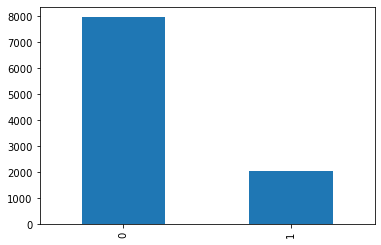

In [29]:
# os dados estão desbalanceados.
df.Exited.value_counts().plot.bar();

In [12]:
df.shape

(10000, 11)

* **Checando se existem dados duplicados**

In [30]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [31]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [32]:
df[df.duplicated(subset=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'])]

Empty DataFrame
Columns: [CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

* **Não existem dados duplicados no conjunto.**

In [16]:
# Plots
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [17]:
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)

In [33]:
pie_plot(df["Exited"].value_counts(), 
         plot_title="<b>Client Churn Distribution<b>")

* **Podemos verificar que as classes estão desbalanceadas, isso pode fazer com que o modelo no de uma falsa impressão de acurácia. Existem algumas formas de tratar esse problema.**
* **Podemos criar amostras aleatórias da classe minoritária até que atinja um equilíbrio porém isso pode nos levar ao overfitting.**
* **Podemos também retirar algumas amostras aleatórias da classe maioritária até que atinja um equilíbrio, mas isso pode nos levar a perda de informações e consequentemente ao underfitting.**
* **Uma outra alternativa são criar dados sintéticos da classe minoritária através da técnica SMOTE até atingir um equilíbrio, essa técnica eu julgo ser a mais recomendada para esse caso, porém existem outras técnicas que possívelmente serão estudadas se necessária.**

In [34]:
#Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  category
 3   Gender           10000 non-null  category
 4   Age              10000 non-null  int64   
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  category
 9   IsActiveMember   10000 non-null  category
 10  EstimatedSalary  10000 non-null  float64 
 11  Exited           10000 non-null  int64   
dtypes: category(4), float64(2), int64(6)
memory usage: 664.7 KB


* **O dataset possui 10mil linhas, para esse exemplo precisamos dividir a base em duas partes de forma estratificada pela coluna Exited, pois essa feature é a nossa target e esta desbalanceada.**


In [35]:
#Nesse exemplo irei utilizar a biblioteca StratifiedShuffleSplit do skealearn
#vamos importar a biblioteca
from sklearn.model_selection import StratifiedShuffleSplit

In [36]:
# Dividindo o conjunto em duas partes, uma com 80% e outra com 20%(validação)
split = StratifiedShuffleSplit(test_size=0.8, random_state=777)

In [37]:
# com a amostra estratificada as médias das variáveis numéricas ficaram com pouca variância.
for x, y in split.split(df, df['Exited']):
    tr_x = df.iloc[x]
    tr_y = df.iloc[y]
print(tr_x.describe())
print('#'*65)
print(tr_y.describe())

        CustomerId  CreditScore      Age   Tenure    Balance  NumOfProducts  \
count     2000.000     2000.000 2000.000 2000.000   2000.000       2000.000   
mean  15688504.490      650.091   39.068    5.144  76114.990          1.540   
std      72385.334       93.850   10.544    2.903  62325.661          0.589   
min   15565701.000      350.000   18.000    0.000      0.000          1.000   
25%   15624862.000      586.000   32.000    3.000      0.000          1.000   
50%   15688164.500      654.500   37.000    5.000  96939.285          1.000   
75%   15750811.500      713.000   44.000    8.000 127763.078          2.000   
max   15815656.000      850.000   84.000   10.000 238387.560          4.000   

       EstimatedSalary   Exited  
count         2000.000 2000.000  
mean        101825.167    0.203  
std          57058.132    0.403  
min            143.340    0.000  
25%          53404.285    0.000  
50%         102239.865    0.000  
75%         149868.488    0.000  
max         1999

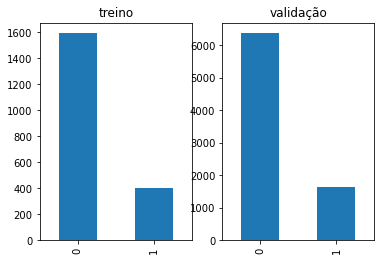

In [38]:
# visualizando os conjuntos por Churn para confirmar que ambas ficaram equivalentes.
t1 = tr_x.Exited.value_counts()
t2 = tr_y.Exited.value_counts()

plt.figure(1)
plt.subplot(121)
plt.title('treino')
t1.plot.bar()

plt.subplot(122)
plt.title('validação')
t2.plot.bar()
plt.show()

In [39]:
tr_x.shape, tr_y.shape

((2000, 12), (8000, 12))

* **Bom agora já temos nosso conjunto de treino e de validação, vamos salvar o conjunto de validação, pois ele será utilizado apenas no final do projeto.**

In [40]:
# Vamos Salvar o conjunto de treino e validação
tr_y.to_csv('./Data/treino_base.csv', index=False)
tr_x.to_csv('./Data/validação_base.csv', index=False)

In [41]:
#Conferindo se os dados foram salvos corretamente.
pd.read_csv('./Data/treino_base.csv').head()

CustomerId  CreditScore Geography  Gender  Age  Tenure    Balance  \
0    15594902          518    France    Male   38       3  90957.810   
1    15674551          535   Germany    Male   40       7 111756.500   
2    15668695          536    France  Female   22       5  89492.620   
3    15748589          736    France  Female   30       9      0.000   
4    15771222          779    France  Female   42       5      0.000   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          0               1       162304.590       0  
1              1          1               0         8128.320       1  
2              1          0               0        42934.430       0  
3              2          1               0        34180.330       0  
4              2          0               0        25951.910       0

* **Bom agora já temos nosso conjunto de treino e validação separados, vamos começar o trabalho.**


In [44]:
valid = pd.read_csv('https://raw.githubusercontent.com/Jcnok/Stack_Labs_Churn/main/Data/valida%C3%A7%C3%A3o_base.csv', index_col=['CustomerId'])
valid.head()

CreditScore Geography  Gender  Age  Tenure    Balance  \
CustomerId                                                          
15731755            680    France    Male   49      10      0.000   
15632576            520    France    Male   31       4  93249.400   
15651955            603    France    Male   31       4      0.000   
15697310            559   Germany  Female   28       3 152264.810   
15792360            668    France    Male   32       7      0.000   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15731755                2          1               0       187008.450       0  
15632576                1          1               0        77335.750       0  
15651955                2          0               1         9607.100       0  
15697310                1          0               0        64242.310       0  
15792360                2          1               1          777.370       0

In [45]:
treino = pd.read_csv('https://raw.githubusercontent.com/Jcnok/Stack_Labs_Churn/main/Data/treino_base.csv', index_col=['CustomerId'])
treino.head() 

CreditScore Geography  Gender  Age  Tenure    Balance  \
CustomerId                                                          
15594902            518    France    Male   38       3  90957.810   
15674551            535   Germany    Male   40       7 111756.500   
15668695            536    France  Female   22       5  89492.620   
15748589            736    France  Female   30       9      0.000   
15771222            779    France  Female   42       5      0.000   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15594902                1          0               1       162304.590       0  
15674551                1          1               0         8128.320       1  
15668695                1          0               0        42934.430       0  
15748589                2          1               0        34180.330       0  
15771222                2          0               0        25951.910       0

# Para esse projeto vamos utilizar uma biblioteca muito poderosa de automl(Pycaret)

In [46]:
#Importando as lib necessárias para o projeto.  
from pandas_profiling import ProfileReport
from pycaret.classification import *
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from pycaret.utils import check_metric
%matplotlib inline

In [47]:
#Criando um setup basico do pycaret para comparação:
basic = setup(data=treino,
              target='Exited',
              session_id=777,              
              normalize=True,
              normalize_method='minmax',
              profile=True,
              html=True
             )

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
# Valores unicos
df.NumOfProducts.unique(), df.Tenure.unique()

(array([1, 3, 2, 4], dtype=int64),
 array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64))

In [49]:
# Variáveis ordinárias.
ord_dic ={'NumOfProducts':['1','2','3','4'],
          'Tenure':['0','1','2','3','4','5','6','7','8','9','10']
         }

In [50]:
ord_dic

{'NumOfProducts': ['1', '2', '3', '4'],
 'Tenure': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']}

# Experimento01

In [63]:
#Criando um setup basico do pycaret para comparação:
experimento01 = setup(    data=treino,
                      target='Exited',
                      session_id=777,
                      ordinal_features=ord_dic,
                      #ignore_features=# ignore func_def.
                      normalize=True,
                      normalize_method='minmax',
                      transformation= True,
                      transformation_method= 'quantile',
                      remove_outliers=True,
                      outliers_threshold=0.05, 
                      experiment_name="experimento01",
                      silent=True,
                      verbose=True,
                      #profile=True,
                      html=True
             )

In [64]:
#conjunto de treino transformado.
get_config("X_train").head()

CreditScore    Age  Tenure  Balance  NumOfProducts  \
CustomerId                                                       
15700263         -0.813  1.977   2.000   -5.199          0.000   
15691004         -2.886 -0.036   1.000   -5.199          0.000   
15809906         -0.917 -1.450   1.000    1.261          1.000   
15681506         -1.762  0.604   1.000   -5.199          1.000   
15682955          1.071 -0.653   2.000   -0.161          0.000   

            EstimatedSalary  Geography_France  Geography_Germany  \
CustomerId                                                         
15700263              0.409             1.000              0.000   
15691004             -0.697             0.000              0.000   
15809906             -1.169             0.000              1.000   
15681506              2.278             0.000              0.000   
15682955             -0.309             1.000              0.000   

            Geography_Spain  Gender_Female  HasCrCard_1  IsActiveMember_0  
CustomerId                                                                 
15700263              0.000          0.000        1.000             1.000  
15691004              1.000          0.000        1.000             0.000  
15809906              0.000          0.000        1.000             0.000  
15681506              1.000          0.000        1.000             0.000  
15682955              0.000          1.000        1.000             0.000

In [65]:
five_best_models = compare_models(sort = 'F1', n_select = 5)

In [56]:
# Tunagem dos 5 melhores.
melhores_tunados = []
for i in range(len(five_best_models)):
    melhores_tunados.append(tune_model(five_best_models[i], optimize = 'F1'))

In [57]:
#combinação soft dos 5 melhores tunados.
combinacao_soft = blend_models(melhores_tunados, method = 'soft')

In [58]:
# resultado da combinação no conjunto de teste.
predict_model(combinacao_soft)

CreditScore    Age  Tenure  Balance  NumOfProducts  EstimatedSalary  \
0          -0.149 -0.653   8.000   -5.199          1.000            0.522   
1           0.226  1.598   0.000    2.082          1.000           -1.244   
2          -0.604  0.198   9.000   -5.199          1.000            0.074   
3          -1.208  0.604   7.000   -0.006          1.000            0.844   
4          -0.561  1.706   3.000   -0.309          0.000            1.750   
...           ...    ...     ...      ...            ...              ...   
2396       -2.592 -0.397   1.000    0.878          0.000            0.680   
2397        0.909 -0.036   8.000   -0.277          1.000            0.088   
2398        0.417 -1.197   5.000   -0.312          0.000           -0.378   
2399        0.492  1.598   5.000    0.929          0.000            0.585   
2400        0.868 -0.782   9.000   -0.180          0.000           -0.815   

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                0.000              0.000            1.000          1.000   
1                1.000              0.000            0.000          0.000   
2                1.000              0.000            0.000          0.000   
3                0.000              0.000            1.000          0.000   
4                1.000              0.000            0.000          0.000   
...                ...                ...              ...            ...   
2396             0.000              1.000            0.000          1.000   
2397             1.000              0.000            0.000          0.000   
2398             1.000              0.000            0.000          0.000   
2399             0.000              1.000            0.000          1.000   
2400             1.000              0.000            0.000          0.000   

      HasCrCard_1  IsActiveMember_0  Exited  Label  Score  
0           1.000             1.000       0      0  0.879  
1           0.000             0.000       1      0  0.813  
2           1.000             0.000       0      0  0.888  
3           1.000             0.000       0      0  0.875  
4           1.000             0.000       0      1  0.610  
...           ...               ...     ...    ...    ...  
2396        0.000             1.000       1      0  0.776  
2397        0.000             0.000       0      0  0.865  
2398        1.000             0.000       0      0  0.770  
2399        1.000             1.000       1      1  0.826  
2400        1.000             1.000       0      0  0.878  

[2401 rows x 15 columns]

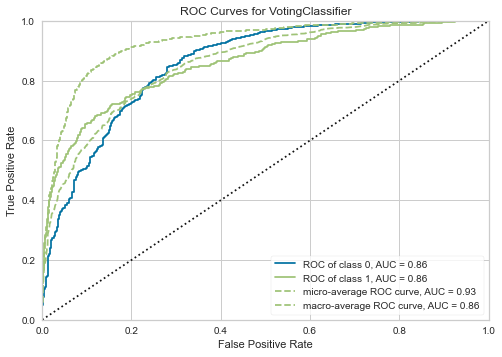

In [59]:
plot_model(combinacao_soft)

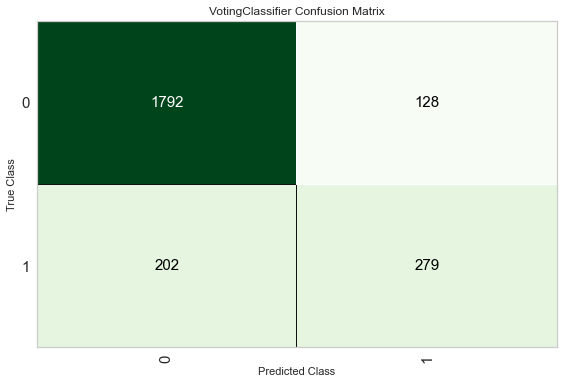

In [60]:
plot_model(combinacao_soft, plot = 'confusion_matrix')

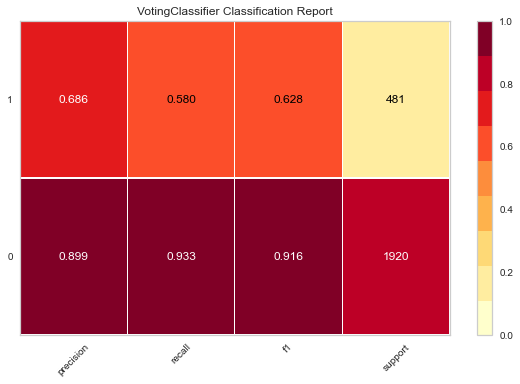

In [61]:
plot_model(combinacao_soft, plot='class_report')

# Experimento 02

In [67]:
# experimento02
experimento02 = setup(data=treino, target="Exited", session_id=777,
                normalize=True, feature_selection=True, remove_outliers=True,
                remove_multicollinearity=True, fix_imbalance=True,
                transformation=True, ignore_low_variance=True, pca=True,
                silent=True, experiment_name="experimento02",
                log_experiment=True)


In [68]:
#conjunto de treino transformado.
get_config("X_train").head()

Component_1  Component_2  Component_3  Component_4  Component_5  \
CustomerId                                                                    
15700263         -0.419        1.678       -0.962        1.614       -0.516   
15691004         -1.285        1.581       -1.601       -1.103        0.797   
15809906          0.420       -0.566       -0.573       -2.351        0.435   
15681506         -0.799        2.624        0.371        0.420        0.948   
15682955         -0.160       -1.275        0.374        0.044       -0.640   

            Component_6  Component_7  Component_8  Component_9  Component_10  \
CustomerId                                                                     
15700263          0.157       -0.758       -0.178       -0.369        -0.405   
15691004         -0.725       -0.344        0.644       -0.282        -0.510   
15809906         -0.584        0.559       -0.761       -0.135         0.014   
15681506         -0.746       -0.028        0.097       -0.203         0.199   
15682955          0.014        0.519        0.629       -0.369        -0.225   

            Component_11  Component_12  Component_13  Component_14  \
CustomerId                                                           
15700263          -0.190        -0.143         0.731        -0.554   
15691004           0.888        -0.030        -0.028        -0.103   
15809906           0.975        -0.060        -0.068        -0.049   
15681506           0.947        -0.062        -0.054        -0.099   
15682955          -0.185        -0.161         0.719        -0.473   

            Component_15  Component_16  Component_17  Component_18  \
CustomerId                                                           
15700263          -0.101        -0.135        -0.186        -0.095   
15691004           0.012        -0.073        -0.133         0.037   
15809906           0.002        -0.092        -0.097         0.011   
15681506          -0.024        -0.053        -0.138         0.062   
15682955          -0.065        -0.157        -0.115        -0.065   

            Component_19  
CustomerId                
15700263          -0.051  
15691004          -0.048  
15809906          -0.065  
15681506          -0.053  
15682955          -0.064

In [70]:
top_model = compare_models(fold=5,
                            sort="F1",
                            n_select=1, 
                            exclude=["qda"])

In [71]:
tuned_model = tune_model(estimator=top_model, fold=5,
                         optimize="F1", choose_better=True)

In [72]:
plot_model(tuned_model, plot="parameter")


Parameters
nan_mode                                           Min
eval_metric                                    Logloss
iterations                                         150
sampling_frequency                             PerTree
leaf_estimation_method                          Newton
grow_policy                              SymmetricTree
penalties_coefficient                                1
boosting_type                                    Plain
model_shrink_mode                             Constant
feature_border_type                       GreedyLogSum
bayesian_matrix_reg                0.10000000149011612
force_unit_auto_pair_weights                     False
l2_leaf_reg                                          4
random_strength                    0.10000000149011612
rsm                                                  1
boost_from_average                               False
model_size_reg                                     0.5
pool_metainfo_options                     {'tags': {}}
subsample                            0.800000011920929
use_best_model                                   False
class_names                                     [0, 1]
random_seed                                        777
depth                                                4
posterior_sampling                               False
border_count                                       254
classes_count                                        0
auto_class_weights                                None
sparse_features_conflict_fraction                    0
leaf_estimation_backtracking            AnyImprovement
best_model_min_trees                                 1
model_shrink_rate                                    0
min_data_in_leaf                                     1
loss_function                                  Logloss
learning_rate                      0.15000000596046448
score_function                                  Cosine
task_type                                          CPU
leaf_estimation_iterations                           1
bootstrap_type                                     MVS
max_leaves                                          16

In [74]:
#Bagging com melhores tunados.
bagged_model = ensemble_model(tuned_model, fold=5)


In [75]:
boosted_model = ensemble_model(tuned_model, fold=5,
                               method="Boosting")

In [77]:
blended_model = blend_models(estimator_list=[tuned_model, boosted_model],fold=5)

In [78]:
best_model = boosted_model
plot_model(best_model, plot="parameter")
print(f"Model: {type(best_model)}")

Parameters
algorithm                                                 SAMME.R
base_estimator  <catboost.core.CatBoostClassifier object at 0x...
learning_rate                                                 1.0
n_estimators                                                   10
random_state                                                  777

Model: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>


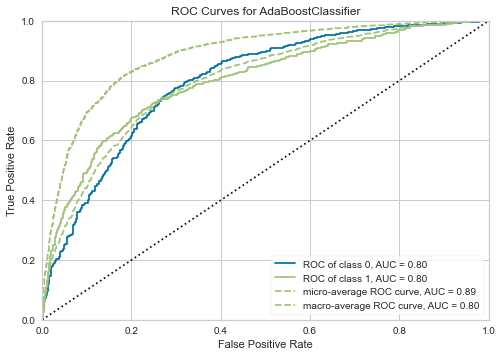

In [49]:
plot_model(best_model, plot="auc")

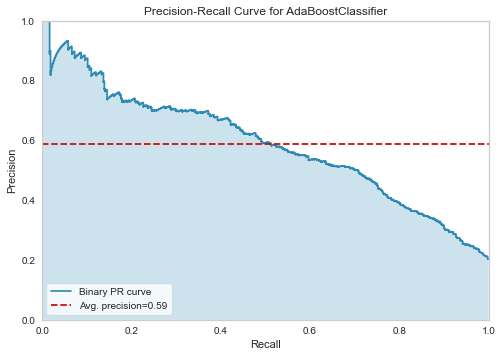

In [79]:
plot_model(best_model, plot="pr")


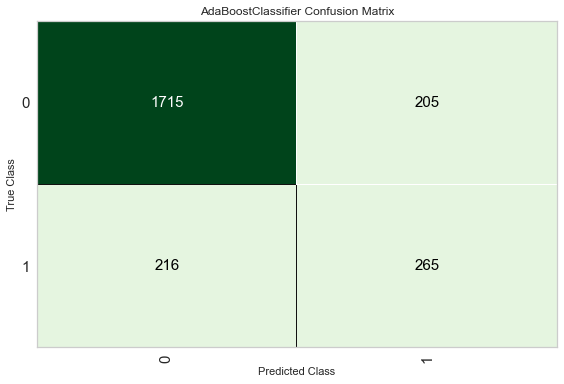

In [80]:
plot_model(best_model, plot="confusion_matrix")


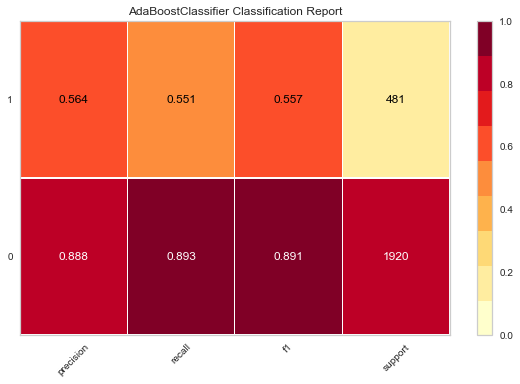

In [81]:
plot_model(best_model, plot="class_report")


In [82]:
predict_model(best_model);


In [83]:
# Função para o conjunto de validação.
def test_score_report(data_unseen, predict_unseen):
    le = LabelEncoder()
    data_unseen["Label"] = le.fit_transform(data_unseen.Exited.values)
    data_unseen["Label"] = data_unseen["Label"].astype(int)
    accuracy = accuracy_score(data_unseen["Label"], predict_unseen["Label"])
    roc_auc = roc_auc_score(data_unseen["Label"], predict_unseen["Label"])
    precision = precision_score(data_unseen["Label"], predict_unseen["Label"])
    recall = recall_score(data_unseen["Label"], predict_unseen["Label"])
    f1 = f1_score(data_unseen["Label"], predict_unseen["Label"])

    df_unseen = pd.DataFrame({
        "Accuracy" : [accuracy],
        "AUC" : [roc_auc],
        "Recall" : [recall],
        "Precision" : [precision],
        "F1 Score" : [f1]
    })
    return df_unseen
# Confusion Matrix
def conf_mat(data_unseen, predict_unseen):
    unique_label = data_unseen["Label"].unique()
    cmtx = pd.DataFrame(
        confusion_matrix(data_unseen["Label"],
                         predict_unseen["Label"],
                         labels=unique_label), 
        index=['{:}'.format(x) for x in unique_label], 
        columns=['{:}'.format(x) for x in unique_label]
    )
    ax = sns.heatmap(cmtx, annot=True, fmt="d", cmap="YlGnBu")
    ax.set_ylabel('Predicted')
    ax.set_xlabel('Target');
    ax.set_title("Matriz de Confuzão do conjunto de Validação", size=14);

# Realização a predição do conjunto que ainda não conhecemos.

 Accuracy   AUC  Recall  Precision  F1 Score
    0.815 0.708   0.528      0.546     0.537


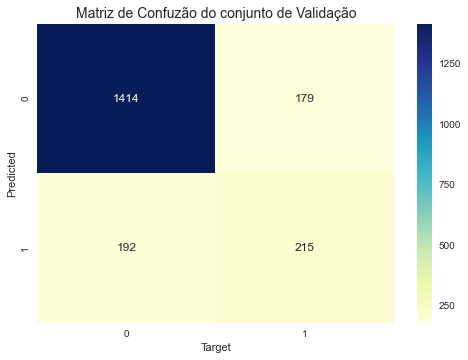

In [84]:
predict_valid = predict_model(best_model, data=valid);
score_valid = test_score_report(valid, predict_valid)
print(score_valid.to_string(index=False))
conf_mat(valid, predict_valid)

# Conclusão:

* **Tivemos uma precisão de +-54% o que significa que o modelos consegue prever corretamente 54% dos clientes que realmente saíram(Churn).**
* **O modelo indentificou +- 52% de todos os clientes que saíram(Churn).**
* **Podemos dizer que a dentro de uma amostra de 100 clientes que modelo separa como Churn 54 estão classificados corretamente.**
* **Podemos dizer também que, se temos 20% real de Churn, o modelo ira prever cerca de 40%( o dobro ) de clientes propensos ao Churn, e que dentro dessa base de 40%, temos o equivalente a 52% de todos os clientes que realmente deram Churn.**
* **Podemos melhorar o recall(Sensibilidade) porém isso acarretará na diminuição da nossa precisão, isso pode se ajustado de acordo com o modelo de negócio.** 
